In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('https://github.com/Alireza-Akhavan/datasets_and_models/raw/main/ratings.csv')
train, validation = train_test_split(dataset, test_size=0.2, random_state=42)

n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())


def create_dataset(df):
    user_inputs = tf.data.Dataset.from_tensor_slices(df['user_id'])
    book_inputs = tf.data.Dataset.from_tensor_slices(df['book_id'])
    ratings = tf.data.Dataset.from_tensor_slices(df['rating'])
    dataset = tf.data.Dataset.zip(((user_inputs, book_inputs), ratings))
    dataset = dataset.shuffle(len(df))
    dataset = dataset.batch(32)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset


train_dataset = create_dataset(train)
validation_dataset = create_dataset(validation)

In [2]:
book_input = tf.keras.layers.Input(shape=[1], name="Book-Input")
book_embedding = tf.keras.layers.Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = tf.keras.layers.Flatten(name="Flatten-Books")(book_embedding)

user_input = tf.keras.layers.Input(shape=[1], name="User-Input")
user_embedding = tf.keras.layers.Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = tf.keras.layers.Flatten(name="Flatten-Users")(user_embedding)

prod = tf.keras.layers.Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = tf.keras.models.Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

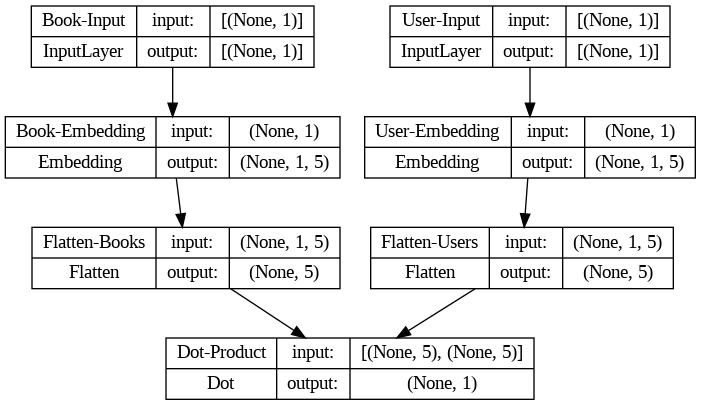

In [3]:
keras.utils.plot_model(model, show_shapes=True)

In [4]:
from keras.callbacks import ReduceLROnPlateau

# Define the callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Add the callback to the fit function
history = model.fit(train_dataset, epochs=10,
                    callbacks=[reduce_lr],
                    validation_data=validation_dataset)

Epoch 1/10
24544/24544 [==============================] - 122s 5ms/step - loss: 13.9469 - val_loss: 8.9091 - lr: 0.0010
Epoch 2/10
24544/24544 [==============================] - 105s 4ms/step - loss: 4.6770 - val_loss: 2.6496 - lr: 0.0010
Epoch 3/10
24544/24544 [==============================] - 115s 5ms/step - loss: 1.8080 - val_loss: 1.6492 - lr: 0.0010
Epoch 4/10
24544/24544 [==============================] - 104s 4ms/step - loss: 1.1996 - val_loss: 1.3241 - lr: 0.0010
Epoch 5/10
24544/24544 [==============================] - 113s 4ms/step - loss: 0.9620 - val_loss: 1.1684 - lr: 0.0010
Epoch 6/10
24544/24544 [==============================] - 108s 4ms/step - loss: 0.8424 - val_loss: 1.0777 - lr: 0.0010
Epoch 7/10
24544/24544 [==============================] - 105s 4ms/step - loss: 0.7727 - val_loss: 1.0228 - lr: 0.0010
Epoch 8/10
24544/24544 [==============================] - 107s 4ms/step - loss: 0.7299 - val_loss: 0.9842 - lr: 0.0010
Epoch 9/10
24544/24544 [=======================

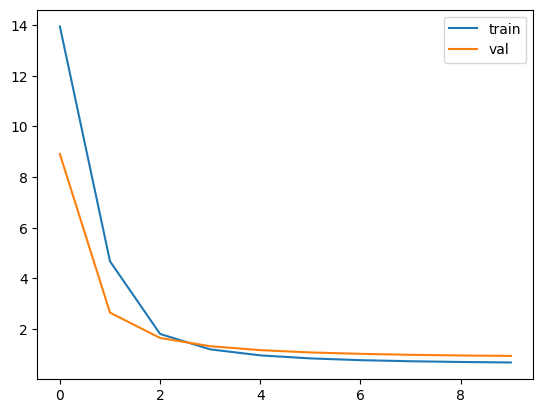

In [7]:
bimport matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"])

In [8]:
model.fit(train_dataset, epochs=1)

24544/24544 [==============================] - 100s 4ms/step - loss: 0.6671
